In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

from model_myokit import ModelJK
sys.path.append('../')
import plot_cell


Times has been set.


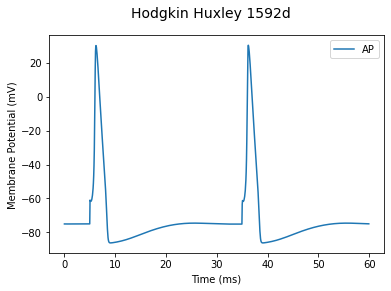

--- 2.004315137863159 seconds ---


In [2]:
'''
Hodgkin Huxley 1592d
'''
model_path = "./mmt-model-files/hh-1952d-modern.mmt"  
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Hodgkin Huxley 1592d"
times = np.linspace(0,60,1000)
model.set_times(times)
d = model.simulate(pre_sim=0)    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


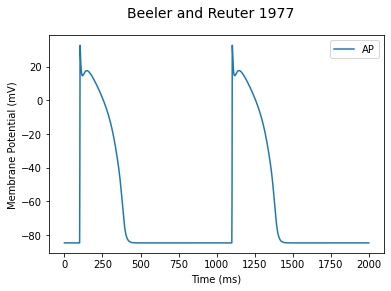

--- 1.8949284553527832 seconds ---


In [3]:
'''
Beeler and Reuter 1977
'''
model_path = "./mmt-model-files/br-1977.mmt" 
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Beeler and Reuter 1977"
times = np.linspace(0,2000,5000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


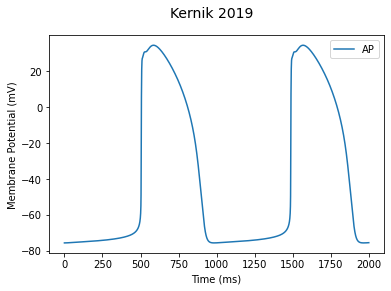

--- 2.827803373336792 seconds ---


In [4]:
'''
Kernik 2019
'''
model_path = "./mmt-model-files/kernik-2019.mmt" 
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Kernik 2019"
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


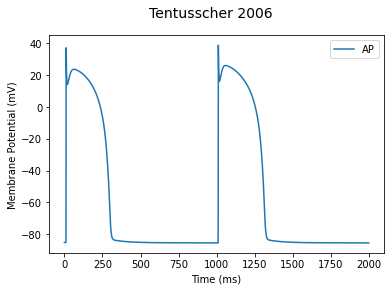

--- 2.3136191368103027 seconds ---


In [5]:
'''
Tentusscher 2006
'''
model_path = "./mmt-model-files/tentusscher-2006.mmt" 

start_time = time.time()
model = ModelJK(model_path) 
model.name = "Tentusscher 2006"
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


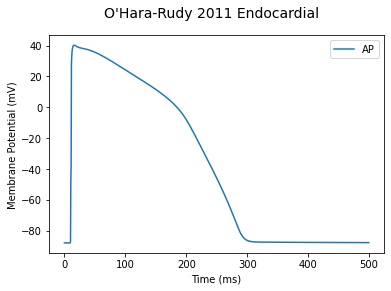

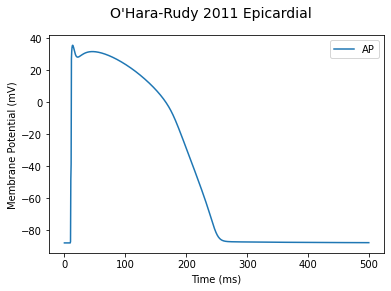

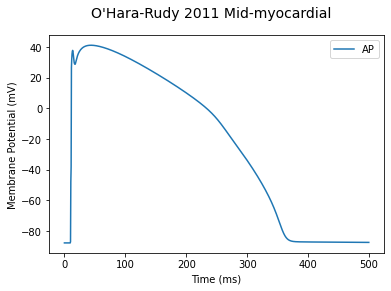

--- 5.955969572067261 seconds ---


In [6]:
'''
O'Hara-Rudy 2011
'''
model_path = "./mmt-model-files/ohara-2011.mmt" 
cells = {
    'Endocardial' : 0,
    'Epicardial' : 1,
    'Mid-myocardial' : 2,
}
start_time = time.time()
model = ModelJK(model_path) 
model.name = "O'Hara-Rudy 2011"
times = np.arange(30)
times = np.linspace(0,500,1000)
model.set_times(times)
model.bcl = 1000
for name, mode in cells.items():    
    model.simulation.set_constant('cell.mode', mode)    
    d = model.simulate(pre_sim=1)    
    plot_cell.plot_AP(model.name+' '+name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))